<a href="https://colab.research.google.com/github/FiShaughnesy85/gcp-demo/blob/main/ARMyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://vitalflux.com/autoregressive-ar-models-with-python-examples/

<bound method NDFrame.head of             date     visits  day month  week  year  black_Friday  easter  \
0     01/10/2019   797240.0  Tue   Oct    23  2019             0       0   
1     02/10/2019   719241.0  Wed   Oct    23  2019             0       0   
2     03/10/2019   700060.0  Thu   Oct    23  2019             0       0   
3     04/10/2019   721915.0  Fri   Oct    23  2019             0       0   
4     05/10/2019   839776.0  Sat   Oct    23  2019             0       0   
...          ...        ...  ...   ...   ...   ...           ...     ...   
1123  28/10/2022  1011135.0  Fri   Oct    26  2022             0       0   
1124  29/10/2022  1001508.0  Sat   Oct    26  2022             0       0   
1125  30/10/2022  1096682.0  Sun   Oct    27  2022             0       0   
1126  31/10/2022  1037435.0  Mon   Oct    27  2022             0       0   
1127  01/11/2022  1031206.0  Tue   Nov    27  2022             0       0   

      stores_open  payday_week  
0               1       

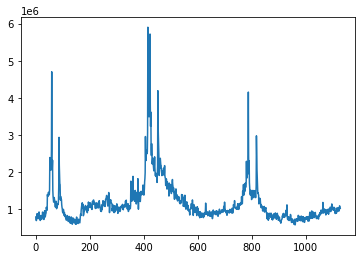

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Load AutoReg class from statsmodels.tsa.ar_model module
#
from statsmodels.tsa.ar_model import AutoReg
# Load and plot the time-series data
#
url='/content/NEW raw data from AA visits only more parameters.csv'
df = pd.read_csv(url,sep=",")
print(df.head)
df['visits'].plot()

P-value:  0.0016722957838592447


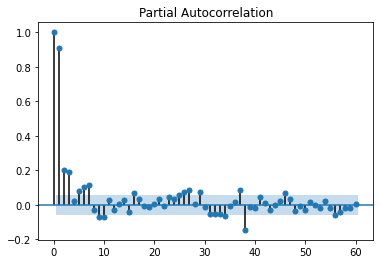

In [6]:
#
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#
from statsmodels.tsa.stattools import adfuller
#
# Run the test
#
df_stationarityTest = adfuller(df['visits'], autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])
#
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['visits'], lags=60)

In [7]:
#
# Create training and test data
#
train_data = df['visits'][:len(df)-100]
test_data = df['visits'][len(df)-100:]
#
# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data, lags=60).fit()
#
# Print Summary
#
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                 visits   No. Observations:                 1028
Model:                    AutoReg(60)   Log Likelihood              -13205.746
Method:               Conditional MLE   S.D. of innovations         203487.727
Date:                Mon, 28 Nov 2022   AIC                             24.575
Time:                        15:12:11   BIC                             24.887
Sample:                            60   HQIC                            24.694
                                 1028                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.459e+04   1.98e+04      2.761      0.006    1.58e+04    9.33e+04
visits.L1      0.6047      0.030     20.036      0.000       0.546       0.664
visits.L2      0.0717      0.036      2.009      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


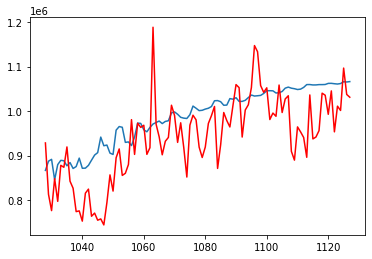

In [8]:
#
# Make the predictions
#
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
#
# Plot the prediction vs test data
#
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')